<h2> Examen de Simulacion </h2>
Nombre: Esteban David Rosero Perez

# Proyecto Simulacion SIMPY

Objetivos a tomar en cuenta en la simulacion

•	Solo se va a tener en cuanta uno de los recintos electorales (investigar datos de cuantas personas asisten a votar).<br>
•	Tomar los resultados de la regresión para la vacuna según la llegada.<br>
•	Se tiene una promedio que el 80% de personas realizaran el proceso de vacunación dentro del Ecuador.<br>
•	Dentro del procesos se tiene que alrededor del 5% - 10% no podrán vacunarse.<br>
•	Las personas solo tiene un recinto electoral para realizar el proceso.<br>
•	Las personas realizan la primera vacuna y 30 días después la segunda vacuna.<br>
•	La persona se acerca a la mesa  y hacen fila en caso de ser necesario para recibir la vacuna.<br>
•	Realiza la vacunación en un tiempo aleatorio entre 5 a 10 minutos.<br>
•	Debe esperar 20 minutos dentro del establecimiento para verificar que no tenga problemas de salud.<br>
•	La persona recibe su certificado de vacunación y la fecha de la próxima vacuna entre 2 – 3 minutos.<br>
•	La persona sale del recinto electoral.<br>

El programa deberá generar gráficas que indiquen la ecuación matemática de las tendencias .<br>
•	Deben calcularse las siguientes métricas del sistema de simulación de eventos discretos :<br>
•	Total de de personas que realizaron el proceso de vacunación.<br>
•	Grafico del porcentaje de personas que no recibieron la vacuna.<br>
•	El tiempo promedio de espera.<br>

<h2> Introduccion </h2>
El recinto electoral que se va a tomar en cuenta es en la provincia de pichincha, canton quito, parroquia calderon, en el Colegio Nacional Abdon Calderon, en este recinto acuden 14 000 personas. Tiene tambien un total de 40 juntas por el cual nosotros para la simulacion vamos a tomar en cuenta 2 aspectos:<br>
•	En la primera simulacion nosotros vamos a tomar en cuenta cuantos acuden al recinto electoral y que tiempo se demoran por vacunacion, teniendo en cuenta que el 80% de la poblacion no desea vacunarse, como tambien de un 5 a 10% acude a vacunarse pero no puede por que ha contraido el virus. En esa simulacion se mostrara la cantidad de vacunados y la cantidad de personas que
no fueron vacunadas y se podra observar la hora en la que fueron vacunadas.<br>
•	En la segunda simulacion vamos a tomar en cuenta un pequeño porcentaje de las personas que acude a este recinto, pero simulando que dentro de 30 dias regresan a la segunda dosis, para terminar con el proceso de vacunacion, en esa simulacion se mostrara el tiempo por persona que toma la vacunacion en ese recinto.


<h2>Observacion:</h2>
Para la simulacion se ha dividido los tiempos de la simulacion a:<br>
1 simulacion = 1 dia <br>
8 horas = 0.33 simulacion <br>
1 hora = 0.041 simulacion <br>
60 minutos = 0.041 simulacion <br>
30 minutos = 0.020 simulacion <br>
1 minuto = 0.00066 simulacion <br>

<h2> Importamos las librerias </h2>

In [56]:
import simpy
import random
import numpy
import matplotlib.pyplot as pp

# Primera Simulacion
En la primera simulacion nosotros vamos a tomar en cuenta cuantos acuden al recinto electoral y que tiempo se demoran por vacunacion, teniendo en cuenta que el 80% de la poblacion no desea vacunarse, como tambien de un 5 a 10% acude a vacunarse pero no puede por que ha contraido el virus. En esa simulacion se mostrara la cantidad de vacunados y la cantidad de personas que no fueron vacunadas y se podra observar la hora en la que fueron vacunadas.

<h2> Ingresamos los parametros Iniciales Primera Simulacion</h2>

In [57]:
inicio = 100
mesas = 10
intervalo = 0.00396
tiempo_simulacion = 1 # 1 equivale a 1 dia de simulacion,
persona_vacunadas={}
persona_no_vacunadas={}

<h2> Creamos la logica para la primera simulacion: </h2>
Primero procedemos a crear la clase de vacunacion, en la cual se mantiene toda la logica de la simulacion aqui se coloca los metodos que habiamos declarado en el inicio de la simulacion, por ejemplo: el metodo para la llegada de la persona a la mesa, el tiempo que tarda en la vacunacion cada persona, etc.
En esta simulacion solo vamos a tomar en cuenta cuantas personas se vacunan en un dia con 10 mesas disponibles y con un rango horario de 8 am a 6pm, que en nuestro rango equivale a 8 horas es 0.33 en la simulacion.

In [58]:
class vacunacion():
    def __init__(self,entorno,mesas):
        self.env = entorno
        self.mesas = simpy.Resource(entorno, mesas)

    def llegada_mesa(self,tiempo):
        yield self.env.timeout(tiempo)        

    def vacunacion_persona(self,tiempo):
        yield self.env.timeout(tiempo)

    def espera_sintomas(self,tiempo):
        yield self.env.timeout(tiempo)
    
    def espera_certificado(self,tiempo):
        yield self.env.timeout(tiempo)

    def espera_segunda_dosis(self,tiempo):
        yield self.env.timeout(tiempo)

    def cerro_centro(self):
        yield self.mesas.request()


    def llegada_recinto(self,persona):
        print('llega {} a la hora {:,.6f}'.format(persona, self.env.now))
        
        with self.mesas.request() as mesa:
            if(env.now>0.33):
                self.cerro_centro

            yield mesa
            #proceso de llegar a la vacunacion
            tiempo_llegada = random.uniform(0.00066,0.00198)
            print('El {} se traslada a la mesa a la hora {:,.6f}'.format(persona,self.env.now))
            yield self.env.process(self.llegada_mesa(tiempo_llegada))
            print('el {} llego a la mesa a la hora {:,.6f}'.format(persona,self.env.now))            
            ##proceso de vacunacion
            tiempo_vacunacion = random.uniform(0.0033, 0.0066)
            print('El {} se va a vacunar a la hora {:,.6f}'.format(persona,self.env.now))
            yield self.env.process(self.vacunacion_persona(tiempo_vacunacion))
            print('El {} se acabo de vacunar a la hora {:,.6f}'.format(persona,self.env.now))
            #proceso de salida de la mesa de vacunacion
        tiempo_espera_sintomas = 0.0132
        print('El {} espera por sintomas {:,.6f}'.format(persona,self.env.now))
        yield self.env.process(self.espera_sintomas(tiempo_espera_sintomas))
        tiempo_espera_certificado = random.uniform(0.00132, 0.00198)
        print('El {} espera por certificado {:,.6f}'.format(persona,self.env.now))
        yield self.env.process(self.espera_certificado(tiempo_espera_certificado))
        print('El {} salio a la hora {:,.6f}'.format(persona,self.env.now))

Procedemos a crear la clase simulacion, aqui nosotros declaramos el entorno que va a simular y en que tiempos queremos que se simule en nuestro caso, tomaremos en cuenta que la vacunacion solo son 8 horas por dia.
En el metodo ejecutar simulacion nosotros colocamos el rango que es 0.33 simulacion = 8 horas, solo dentro de ese rango puede seguir ingresando las personas.

In [59]:
class Simulacion():

    def __init__(self,inicio):
        self.inicio = inicio
        self.nombre_persona = 'persona_{}'
        

    def ejecutar_simulacion(self,env,mesas,intervalo):
        vacun = vacunacion(env, mesas)
        self.iniciar_persona(env, vacun)

        while True:
            if(env.now<0.33):
                estado = random.randint(1,100)
                if (estado < 10) :
                    print("no se vacuna")
                    persona_no_vacunadas[env.now] = persona_no_vacunadas[env.now] + 1 if env.now in persona_no_vacunadas else  1
                else:
                    print("se vacuna")
                    persona_vacunadas[env.now] = persona_vacunadas[env.now] + 1 if env.now in persona_vacunadas else 1
                    yield env.timeout(random.uniform(intervalo-0.00132,intervalo+0.00132))
                    self.inicio+=1
                    print("agrego")
                    yield env.process(vacun.llegada_recinto(self.nombre_persona.format(self.inicio)))
            if(env.now<31):
                 yield env.timeout(random.uniform(intervalo-0.00132,intervalo+0.00132))


    def iniciar_persona(self,env,procVacu):
        for i in range(self.inicio):
             #se vacuna o no 
            estado = random.randint(1,100)
            if (estado < 10) :
                print("no se vacuna")
                persona_no_vacunadas[env.now] = persona_no_vacunadas[env.now] + 1 if env.now in persona_no_vacunadas else  1
            else:
                print("se vacuna")
                persona_vacunadas[env.now] = persona_vacunadas[env.now] + 1 if env.now in persona_vacunadas else 1
                env.process(procVacu.llegada_recinto(self.nombre_persona.format(i)))

# Resultados

Procedemos a simular y estos son los resultados:

In [60]:
env = simpy.Environment()
simulacion = Simulacion(inicio)
env.process(simulacion.ejecutar_simulacion(env, mesas, intervalo))
env.run(until=tiempo_simulacion)

se vacuna
se vacuna
se vacuna
no se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
no se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
no se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
no se vacuna
se vacuna
no se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
no se vacuna
se vacuna
no se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
no se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
no se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
no se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
no se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
no se vacuna
se v

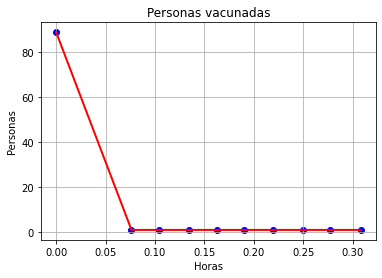

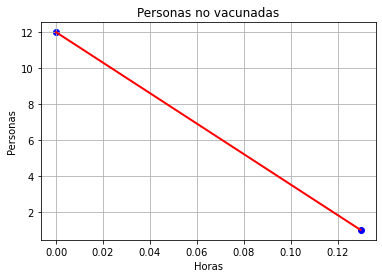

In [61]:
datos=sorted(persona_vacunadas.items()) # Ordenamos los datos
x, y =zip(*datos) 
fig, ax = pp.subplots()
ax.plot(x,y,linewidth=2,color='red') #Dibujamos las lineas
ax.scatter(x,y,color='blue') # Dibujamos los puntos (x,y)
ax.set(ylabel='Personas', xlabel='Horas',
       title='Personas vacunadas')
ax.grid(True) #Generamos una cuadricula

if (persona_no_vacunadas):
    datos=sorted(persona_no_vacunadas.items()) # Ordenamos los datos
    x, y =zip(*datos)    
    fig, ax = pp.subplots()
    ax.plot(x,y,linewidth=2,color='red') #Dibujamos las lineas
    ax.scatter(x,y,color='blue') # Dibujamos los puntos (x,y)
    ax.set(ylabel='Personas', xlabel='Horas',
       title='Personas no vacunadas')
    ax.grid(True) #Generamos una cuadricula

In [72]:
datosNo=sorted(persona_no_vacunadas.items()) # Ordenamos los datos
xn, yn =zip(*datosNo)
datos=sorted(persona_vacunadas.items()) # Ordenamos los datos
x, y =zip(*datos)
print(sum(y))
print(sum(yn))

98
13


<h2>Conclusion </h2>
Como podemos observar la cantidad de vacunados con 10 mesas disponibles dentro de ese recinto, y en la cola al inicio del dia de 100 personas, se logra vacunar al dia a 98 personas y 13 no se vacunaron por haber estado enfermos. entonces la simulacion nos demuestra que se va a obtener un flujo variado  de personas que ingresen a vacunarse dentro de ese recinto electoral.

# Segunda Simulacion
En la segunda simulacion vamos a tomar en cuenta un pequeño porcentaje de las personas que acude a este recinto, pero simulando que dentro de 30 dias regresan a la segunda dosis, para terminar con el proceso de vacunacion, en esa simulacion se mostrara el tiempo por persona que toma la vacunacion en ese recinto.

<h2> Ingresamos los parametros Iniciales</h2>

In [82]:
inicio = 5
mesas = 1
intervalo = 0.00396
tiempo_simulacion = 31
persona_vacunadas={}
persona_no_vacunadas={}
tiempos_espera={} 
tiempos_espera_segunda_dosis={}

<h2> Creamos la logica para la segunda simulacion: </h2>
Primero procedemos a crear la clase de vacunacion, en la cual se mantiene toda la logica de la simulacion aqui se coloca los metodos que habiamos declarado en el inicio de la simulacion, por ejemplo: el metodo para la llegada de la persona a la mesa, el tiempo que tarda en la vacunacion cada persona, etc.
En esta simulacion nosotros declaramos que las personas dentro de una espera de 30 dias regresan a colocarse la segunda dosis, por ello creamos la misma secuencia de la primera dosis en la segunda.
Psdt: en esta simulacion nosotros solo tomamos un rango de personas, para observar el tiempo que se demoran en la primera dosis y el tiempo que a la misma persona le toma la segunda dosis

In [83]:
class vacunacion():
    def __init__(self,entorno,maquinas):
        self.env = entorno
        self.maquinas = simpy.Resource(entorno, maquinas)

    def llegada_mesa(self,tiempo):
        yield self.env.timeout(tiempo)        

    def vacunacion_persona(self,tiempo):
        yield self.env.timeout(tiempo)

    def espera_sintomas(self,tiempo):
        yield self.env.timeout(tiempo)
    
    def espera_certificado(self,tiempo):
        yield self.env.timeout(tiempo)

    def espera_segunda_dosis(self,tiempo):
        yield self.env.timeout(tiempo)

    def cerro_centro(self):
        yield self.maquinas.request()


    def llegada_recinto(self,vehiculo):
        print('llega {} a la hora {:,.6f}'.format(vehiculo, self.env.now))
        
        with self.maquinas.request() as maquina:
            if(env.now>0.33):
                self.cerro_centro
            yield maquina  
            inicial= env.now
            #proceso de llegar a la mesa
            tiempo_llegada = random.uniform(0.00066,0.00198)
            print('El {} se traslada a la mesa a la hora {:,.6f}'.format(vehiculo,self.env.now))
            yield self.env.process(self.llegada_mesa(tiempo_llegada))
            print('el {} llego a la mesa a la hora {:,.6f}'.format(vehiculo,self.env.now))            
            ##proceso de vacunacion
            tiempo_vacunacion = random.uniform(0.0033, 0.0066)
            print('El {} se va a vacunar a la hora {:,.6f}'.format(vehiculo,self.env.now))
            yield self.env.process(self.vacunacion_persona(tiempo_vacunacion))
            print('El {} se acabo de vacunar a la hora {:,.6f}'.format(vehiculo,self.env.now))
            #proceso de salida del vehiculo
        tiempo_espera_sintomas = 0.0132
        print('El {} espera por sintomas {:,.6f}'.format(vehiculo,self.env.now))
        yield self.env.process(self.espera_sintomas(tiempo_espera_sintomas))
        tiempo_espera_certificado = random.uniform(0.00132, 0.00198)
        print('El {} espera por certificado {:,.6f}'.format(vehiculo,self.env.now))
        yield self.env.process(self.espera_certificado(tiempo_espera_certificado))
        print('El {} salio a la hora {:,.6f}'.format(vehiculo,self.env.now))
        tiempos_espera[vehiculo]=env.now-inicial
        if(env.now<30):
            tiempo_espera_segunda_dosis = 30-env.now
        else:
            tiempo_espera_segunda_dosis = 30-env.now
        print('El {} espera por segunda dosis {:,.6f}'.format(vehiculo,self.env.now))
        yield self.env.process(self.espera_segunda_dosis(tiempo_espera_segunda_dosis))
        print('El {} va a la segunda dosis a la hora {:,.6f}'.format(vehiculo,self.env.now))
        with self.maquinas.request() as maquina:            
            yield maquina
            inicial= env.now
            #proceso de llegar a la maquina
            tiempo_llegada = random.uniform(0.00066,0.00198)
            print('2. El {} se traslada a la mesa a la hora {:,.6f}'.format(vehiculo,self.env.now))
            yield self.env.process(self.llegada_mesa(tiempo_llegada))
            print('2. el {} llego a la mesa a la hora {:,.6f}'.format(vehiculo,self.env.now))            
            ##proceso de vacunacion
            tiempo_vacunacion = random.uniform(0.0033, 0.0066)
            print('2. El {} se va a vacunar a la hora {:,.6f}'.format(vehiculo,self.env.now))
            yield self.env.process(self.vacunacion_persona(tiempo_vacunacion))
            print('2. El {} se acabo de vacunar a la hora {:,.6f}'.format(vehiculo,self.env.now))
            #proceso de salida del vehiculo
        tiempo_espera_sintomas = 0.0132
        print('2. El {} espera por sintomas {:,.6f}'.format(vehiculo,self.env.now))
        yield self.env.process(self.espera_sintomas(tiempo_espera_sintomas))
        tiempo_espera_certificado = random.uniform(0.00132, 0.00198)
        print('2. El {} espera por certificado {:,.6f}'.format(vehiculo,self.env.now))
        yield self.env.process(self.espera_certificado(tiempo_espera_certificado))
        print('2. El {} salio a la hora {:,.6f}'.format(vehiculo,self.env.now))
        tiempos_espera_segunda_dosis[vehiculo]=env.now-inicial

Procedemos a crear la clase simulacion, aqui nosotros declaramos el entorno que va a simular y en que tiempos queremos que se simule en nuestro caso, tomaremos en cuenta que la vacunacion solo son 8 horas por dia.
En el metodo ejecutar simulacion nosotros colocamos el rango que es 0.33 simulacion = 8 horas, solo dentro de ese rango puede seguir ingresando las personas.

In [84]:
class Simulacion():

    def __init__(self,inicio):
        self.inicio = inicio
        self.nombre_persona = 'persona_{}'
        

    def ejecutar_simulacion(self,env,maquinas,intervalo):
        vacun = vacunacion(env, maquinas)
        self.iniciar_persona(env, vacun)

        while True:
            if(env.now<0.33):
                estado = random.randint(1,100)
                if (estado < 10) :
                    print("no se vacuna")
                    persona_no_vacunadas[env.now] = persona_no_vacunadas[env.now] + 1 if env.now in persona_no_vacunadas else  1
                else:
                    print("se vacuna")
                    persona_vacunadas[env.now] = persona_vacunadas[env.now] + 1 if env.now in persona_vacunadas else 1
                    yield env.timeout(random.uniform(intervalo-0.00132,intervalo+0.00132))
                    self.inicio+=1
                    print("agrego")
                    yield env.process(vacun.llegada_recinto(self.nombre_persona.format(self.inicio)))
            if(env.now<31):
                 yield env.timeout(random.uniform(intervalo-0.00132,intervalo+0.00132))


    def iniciar_persona(self,env,car_wash):
        for i in range(self.inicio):
             #se vacuna o no 
            estado = random.randint(1,100)
            if (estado < 10) :
                print("no se vacuna")
                persona_no_vacunadas[env.now] = persona_no_vacunadas[env.now] + 1 if env.now in persona_no_vacunadas else  1
            else:
                print("se vacuna")
                persona_vacunadas[env.now] = persona_vacunadas[env.now] + 1 if env.now in persona_vacunadas else 1
                env.process(car_wash.llegada_recinto(self.nombre_persona.format(i)))

# Resultados
Procedemos a simular el proceso

In [85]:
env = simpy.Environment()
simulacion = Simulacion(inicio)
env.process(simulacion.ejecutar_simulacion(env, mesas, intervalo))
env.run(until=tiempo_simulacion)

se vacuna
se vacuna
se vacuna
se vacuna
se vacuna
no se vacuna
llega persona_0 a la hora 0.000000
llega persona_1 a la hora 0.000000
llega persona_2 a la hora 0.000000
llega persona_3 a la hora 0.000000
llega persona_4 a la hora 0.000000
El persona_0 se traslada a la mesa a la hora 0.000000
el persona_0 llego a la mesa a la hora 0.001731
El persona_0 se va a vacunar a la hora 0.001731
se vacuna
El persona_0 se acabo de vacunar a la hora 0.005732
El persona_0 espera por sintomas 0.005732
El persona_1 se traslada a la mesa a la hora 0.005732
agrego
llega persona_6 a la hora 0.006351
el persona_1 llego a la mesa a la hora 0.006585
El persona_1 se va a vacunar a la hora 0.006585
El persona_1 se acabo de vacunar a la hora 0.012543
El persona_1 espera por sintomas 0.012543
El persona_2 se traslada a la mesa a la hora 0.012543
el persona_2 llego a la mesa a la hora 0.014440
El persona_2 se va a vacunar a la hora 0.014440
El persona_2 se acabo de vacunar a la hora 0.017839
El persona_2 espera 

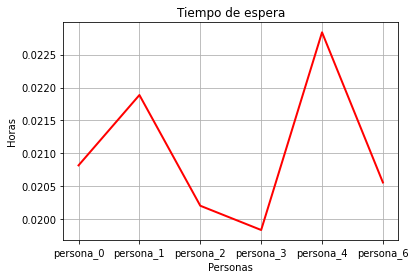

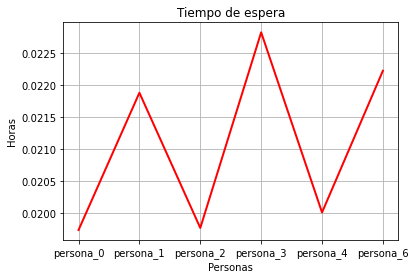

In [86]:
datos=sorted(tiempos_espera.items()) # Ordenamos los datos
x, y =zip(*datos) # Obtener x(tiempo - clave) y el y(Numero de vehiculos atendidos - valor)
fig, ax = pp.subplots()
ax.plot(x,y,linewidth=2,color='red') #Dibujamos las lineas
ax.set(xlabel='Personas', ylabel='Horas',
       title='Tiempo de espera')
ax.grid(True) #Generamos una cuadricula

datos=sorted(tiempos_espera_segunda_dosis.items()) # Ordenamos los datos
x, y =zip(*datos) # Obtener x(tiempo - clave) y el y(Numero de vehiculos atendidos - valor)
fig, ax = pp.subplots()
ax.plot(x,y,linewidth=2,color='red') #Dibujamos las lineas
ax.set(xlabel='Personas', ylabel='Horas',
       title='Tiempo de espera')
ax.grid(True) #Generamos una cuadricula

<h2>Conclusion </h2>
Como podemos observar las 6 primeras personas que se vacunaron tuvieron unos rangos varios a la hora de esperar y el tiempo de duracion por su vacunacion , en el cual en las graficas se puede observar que una persona en la primera dosis no tiene que esperar tanto como en la segunda dosis

# Referencias
http://portal.cne.gob.ec/images/d/2021/Distributivo_recintos_e/Distributivo_de_recintos_final_2021.xls